In [13]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [15]:
system("conda install -n R -y r-arrow")

Restart kernel

In [1]:
library(arrow)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




You need to use s3 uri and not https. You can get it in the AWS S3 Console by navigating to the file and click on the button "Copy S3 Uri"

In [5]:
data<-arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/climate_matrix.csv")

In [26]:
head(data)



NUTS_ID TIMESTAMP  spi01  spi03   spi06   spi12   lfi tmax   fapar sma YEAR
1 AL011   2001-01-01 0.1130 -0.2670 -0.9130 -1.0900  0   5.730 NA    NA  NA  
2 AL012   2001-01-01 0.2905  0.3215 -0.5500 -0.7295 NA  13.260 NA    NA  NA  
3 AL013   2001-01-01 0.3270 -0.0620 -0.2765 -0.8495  0   3.682 NA    NA  NA  
4 AL014   2001-01-01 0.3320  0.1080 -0.2270 -0.5860  0   9.742 NA    NA  NA  
5 AL015   2001-01-01 0.5720  0.5610  0.4480 -0.2130  0   7.825 NA    NA  NA  
6 AL021   2001-01-01 0.1110 -0.5290 -1.1200 -1.1800  0   8.068 NA    NA  NA  
  MONTH hwi_days hwi_min hwi_mean hwi_median hwi_max D1 D2
1 NA    NA       NA      NA       NA         NA      0  0 
2 NA    NA       NA      NA       NA         NA      0  0 
3 NA    NA       NA      NA       NA         NA      0  0 
4 NA    NA       NA      NA       NA         NA      0  0 
5 NA    NA       NA      NA       NA         NA      0  0 
6 NA    NA       NA      NA       NA         NA      0  0

In [12]:
system("conda install -n R -y r-rsample")


In [25]:
data <- data[,-1]

In [31]:
data %>% mutate(country = substr(NUTS_ID, 1, 2)) %>% distinct(country) 

country
1  AL     
2  AT     
3  BE     
4  BG     
5  CH     
6  CY     
7  CZ     
8  DE     
9  DK     
10 EE     
11 EL     
12 ES     
13 FI     
14 FR     
15 HR     
16 HU     
17 IE     
18 IS     
19 IT     
20 LI     
21 LT     
22 LU     
23 LV     
24 ME     
25 MK     
26 MT     
27 NL     
28 NO     
29 PL     
30 PT     
31 RO     
32 RS     
33 SE     
34 SI     
35 SK     
36 TR     
37 UK

In [32]:
econ_data<-arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/economic_matrix.csv")

In [47]:
head(econ_data)

NUTS_ID year area gdp    gross_value_added_A gross_value_added_C employment_A
1 AT111   2013 701  831.59 35                  135                 0.9         
2 AT111   2014 701  866.41 39                  129                 0.9         
3 AT111   2015 701  893.64 41                  134                 0.9         
4 AT111   2016 701  924.98 39                  153                 0.8         
5 AT111   2017 701  997.92 53                  161                 0.8         
6 AT111   2018 701  998.25 41                  158                 0.8         
  employment_C population gva_employ_A gva_employ_C
1 2.3          37.53      37.00000     57.82609    
2 2.1          37.59      38.88889     58.69565    
3 2.2          37.64      43.33333     61.42857    
4 2.3          37.73      45.55556     60.90909    
5 2.2          37.72      48.75000     66.52174    
6 2.2          37.55      66.25000     73.18182

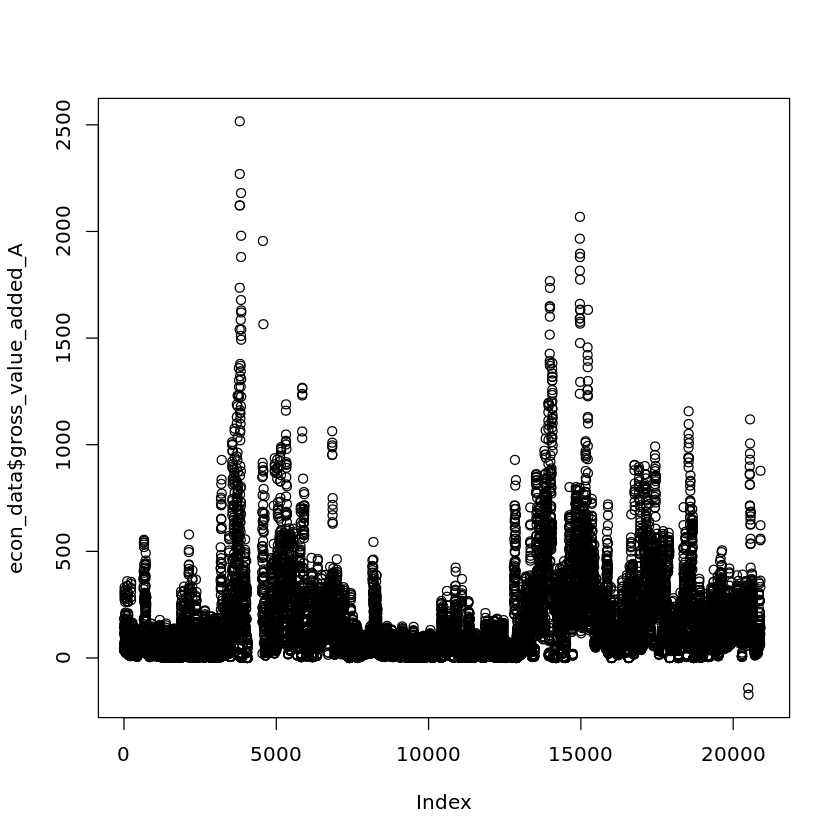

In [37]:
plot(econ_data$gross_value_added_A)

In [127]:
final_data<-arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/final_dataset.csv")

In [128]:
summary(final_data)

   NUTS_ID               YEAR        spi01_min        spi03_min     
 Length:23958       Min.   :2001   Min.   :-4.140   Min.   :-3.575  
 Class :character   1st Qu.:2005   1st Qu.:-2.035   1st Qu.:-1.840  
 Mode  :character   Median :2010   Median :-1.570   Median :-1.385  
                    Mean   :2010   Mean   :-1.646   Mean   :-1.399  
                    3rd Qu.:2014   3rd Qu.:-1.152   3rd Qu.:-0.940  
                    Max.   :2018   Max.   : 0.269   Max.   : 0.951  
                                                                    
   spi06_min        spi12_min          lfi_min         tmax_min      
 Min.   :-3.730   Min.   :-3.3100   Min.   :0.000   Min.   :-17.788  
 1st Qu.:-1.670   1st Qu.:-1.4250   1st Qu.:0.000   1st Qu.:  0.803  
 Median :-1.130   Median :-0.8420   Median :0.000   Median :  3.633  
 Mean   :-1.149   Mean   :-0.8389   Mean   :0.002   Mean   :  3.761  
 3rd Qu.:-0.625   3rd Qu.:-0.2631   3rd Qu.:0.000   3rd Qu.:  6.487  
 Max.   : 1.436   Max.   : 2

In [10]:
final_data$hw_month_08

[1] NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA
   [25] NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA
   [49]  1 NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA  1 NA
   [73] NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA
   [97] NA NA NA NA  1 NA NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA
  [121] NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA  1 NA  1 NA
  [145] NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA
  [169] NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA
  [193]  1 NA  1 NA  1 NA NA NA  1 NA NA NA NA NA NA NA  1 NA  1 NA NA NA  1 NA
  [217] NA NA  1 NA NA NA NA NA NA NA  1 NA  1 NA NA NA  1 NA NA NA NA NA NA NA
  [241] NA NA NA NA  1  1  1 NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
  [265] NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA  1  1  1 NA NA NA NA NA
  [289] NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA
  [313] NA NA NA NA  1 NA  1 NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA
  [337]  1 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA
  [361] NA NA  1 NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA  1 NA NA  1 NA NA NA
  [385] NA NA NA NA  1  1 NA NA  1 NA NA NA NA NA  1 NA NA NA NA NA NA NA  1 NA
  [409] NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA  1  1  1 NA  1 NA NA NA
  [433] NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
  [457] NA NA NA NA  1  1  1 NA NA NA  1 NA NA NA  1 NA NA NA NA NA NA NA  1  1
  [481]  1 NA  1 NA NA  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA
  [505] NA NA  1 NA NA NA NA NA NA NA  1 NA NA NA  1 NA  1 NA NA NA  1 NA NA NA
  [529] NA NA NA NA  1  1 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA  1 NA
  [553] NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA  1  1 NA NA NA NA NA NA
  [577] NA NA  1 NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
  [601] NA NA NA NA  1 NA NA NA  1  1  1 NA NA NA NA NA NA NA NA NA NA NA  1 NA
  [625] NA NA  1  1  1  1  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA
  [649]  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA  1 NA NA NA NA NA
  [673] NA NA NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA
  [697] NA NA NA  1 NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA
  [721]  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA
  [745] NA NA NA NA NA NA NA NA NA  1 NA NA  1 NA NA NA NA NA NA NA NA NA NA  1
  [769] NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA
  [793]  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  1 NA NA NA NA NA
  [817] NA NA NA NA NA  1 NA NA NA  1 NA NA  1 NA NA NA NA NA NA NA NA NA NA  1
  [841] NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA
  [865]  1 NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  1 NA  1 NA NA NA
  [889] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1
  [913] NA NA NA  1 NA NA NA NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA
  [937] NA NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  1 NA  1 NA NA NA
  [961] NA NA NA NA NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA  1
  [985] NA NA NA  1 NA NA NA NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA
 [1009] NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA NA NA  1 NA NA NA
 [1033] NA NA NA NA NA  1 NA NA NA  1 NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA
 [1057] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA
 [1081]  1 NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  1 NA  1 NA NA NA
 [1105] NA NA NA NA NA NA NA NA NA  1 NA NA  1 NA  1 NA NA NA NA NA NA NA NA  1
 [1129] NA NA NA NA NA NA  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA
 [1153]  1 NA  1 NA NA NA NA NA NA NA NA  1 NA NA NA  1 NA NA  1 NA  1 NA NA NA
 [1177] NA NA NA NA NA NA NA NA NA  1 NA NA NA NA  1 NA NA NA NA NA NA NA NA NA
 [12

In [131]:
fd.raw<-arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/final_dataset.csv")

head(fd.raw)


NUTS_ID YEAR spi01_min spi03_min spi06_min spi12_min lfi_min tmax_min
1 AT111   2001 -1.920    -1.670    -1.450    -1.4000   NA      -2.107  
2 AT111   2002 -2.470    -1.660    -2.005    -1.9800   NA       0.998  
3 AT111   2003 -1.675    -2.350    -2.170    -2.2750   NA       0.208  
4 AT111   2004 -1.720    -1.725    -2.515    -2.2750   NA       0.575  
5 AT111   2005 -1.014    -1.225    -2.295    -1.9450   NA       0.166  
6 AT111   2006 -1.570    -2.745    -1.745    -0.3795   NA      -2.592  
  fapar_min sma_min ⋯ gross_value_added_A gross_value_added_C employment_A
1 NA        -2.905  ⋯ NA                   NA                  NA         
2 NA        -3.424  ⋯ 37                   92                 1.6         
3 NA        -1.161  ⋯ 55                   95                 1.6         
4 NA         0.149  ⋯ 45                   92                 1.5         
5 NA        -0.242  ⋯ 34                  110                 1.4         
6 NA        -1.342  ⋯ 37                  111                 1.3         
  employment_C population gva_employ_lagged_A gva_employ_lagged_C gdp_lagged
1  NA             NA            NA                  NA                NA    
2 2.2          37.73            NA                  NA                NA    
3 2.2          37.65      23.12500            41.81818            627.48    
4 2.3          37.58      34.37500            43.18182            674.62    
5 2.2          37.45      30.00000            40.00000            676.25    
6 2.3          37.45      24.28571            50.00000            669.25    
  gva_employ_A gva_employ_C
1       NA           NA    
2       NA           NA    
3 34.37500     43.18182    
4 28.12500     41.81818    
5 22.66667     47.82609    
6 26.42857     50.45455

In [132]:
RGNS$RGN_NUM<-1:nrow(RGNS)
head(RGNS)

NUTS_ID RGN_NUM
1 AT111   1      
2 AT112   2      
3 AT113   3      
4 AT121   4      
5 AT122   5      
6 AT123   6

In [133]:
library(dplyr)
library(xgboost)
library(DiagrammeR)
fd.raw<-fd.raw%>%inner_join(RGNS)
head(fd.raw)

Joining with `by = join_by(NUTS_ID)`


NUTS_ID YEAR spi01_min spi03_min spi06_min spi12_min lfi_min tmax_min
1 AT111   2001 -1.920    -1.670    -1.450    -1.4000   NA      -2.107  
2 AT111   2002 -2.470    -1.660    -2.005    -1.9800   NA       0.998  
3 AT111   2003 -1.675    -2.350    -2.170    -2.2750   NA       0.208  
4 AT111   2004 -1.720    -1.725    -2.515    -2.2750   NA       0.575  
5 AT111   2005 -1.014    -1.225    -2.295    -1.9450   NA       0.166  
6 AT111   2006 -1.570    -2.745    -1.745    -0.3795   NA      -2.592  
  fapar_min sma_min ⋯ gross_value_added_C employment_A employment_C population
1 NA        -2.905  ⋯  NA                  NA           NA             NA     
2 NA        -3.424  ⋯  92                 1.6          2.2          37.73     
3 NA        -1.161  ⋯  95                 1.6          2.2          37.65     
4 NA         0.149  ⋯  92                 1.5          2.3          37.58     
5 NA        -0.242  ⋯ 110                 1.4          2.2          37.45     
6 NA        -1.342  ⋯ 111                 1.3          2.3          37.45     
  gva_employ_lagged_A gva_employ_lagged_C gdp_lagged gva_employ_A gva_employ_C
1       NA                  NA                NA           NA           NA    
2       NA                  NA                NA           NA           NA    
3 23.12500            41.81818            627.48     34.37500     43.18182    
4 34.37500            43.18182            674.62     28.12500     41.81818    
5 30.00000            40.00000            676.25     22.66667     47.82609    
6 24.28571            50.00000            669.25     26.42857     50.45455    
  RGN_NUM
1 1      
2 1      
3 1      
4 1      
5 1      
6 1

In [134]:
RGNS<-data.frame(NUTS_ID=unique(fd.raw$NUTS_ID))

str(RGNS)

'data.frame':	1331 obs. of  1 variable:
 $ NUTS_ID: chr  "AT111" "AT112" "AT113" "AT121" ...


In [135]:
colnames(fd.raw)

[1] "NUTS_ID"             "YEAR"                "spi01_min"          
  [4] "spi03_min"           "spi06_min"           "spi12_min"          
  [7] "lfi_min"             "tmax_min"            "fapar_min"          
 [10] "sma_min"             "spi01_mean"          "spi03_mean"         
 [13] "spi06_mean"          "spi12_mean"          "lfi_mean"           
 [16] "tmax_mean"           "fapar_mean"          "sma_mean"           
 [19] "spi01_median"        "spi03_median"        "spi06_median"       
 [22] "spi12_median"        "lfi_median"          "tmax_median"        
 [25] "fapar_median"        "sma_median"          "spi01_max"          
 [28] "spi03_max"           "spi06_max"           "spi12_max"          
 [31] "lfi_max"             "tmax_max"            "fapar_max"          
 [34] "sma_max"             "drg_agr_w"           "drg_agr_s"          
 [37] "drg_man_w"           "drg_man_s"           "drg_agr_w_01"       
 [40] "drg_agr_w_02"        "drg_agr_w_03"        "drg_agr_w_04"       
 [43] "drg_agr_w_05"        "drg_agr_w_06"        "drg_agr_w_07"       
 [46] "drg_agr_w_08"        "drg_agr_w_09"        "drg_agr_w_10"       
 [49] "drg_agr_w_11"        "drg_agr_w_12"        "drg_agr_s_01"       
 [52] "drg_agr_s_02"        "drg_agr_s_03"        "drg_agr_s_04"       
 [55] "drg_agr_s_05"        "drg_agr_s_06"        "drg_agr_s_07"       
 [58] "drg_agr_s_08"        "drg_agr_s_09"        "drg_agr_s_10"       
 [61] "drg_agr_s_11"        "drg_agr_s_12"        "drg_man_w_01"       
 [64] "drg_man_w_02"        "drg_man_w_03"        "drg_man_w_04"       
 [67] "drg_man_w_05"        "drg_man_w_06"        "drg_man_w_07"       
 [70] "drg_man_w_08"        "drg_man_w_09"        "drg_man_w_10"       
 [73] "drg_man_w_11"        "drg_man_w_12"        "drg_man_s_01"       
 [76] "drg_man_s_02"        "drg_man_s_03"        "drg_man_s_04"       
 [79] "drg_man_s_05"        "drg_man_s_06"        "drg_man_s_07"       
 [82] "drg_man_s_08"        "drg_man_s_09"        "drg_man_s_10"       
 [85] "drg_man_s_11"        "drg_man_s_12"        "spi12_yearly"       
 [88] "hw_month_01"         "hw_month_02"         "hw_month_03"        
 [91] "hw_month_04"         "hw_month_05"         "hw_month_06"        
 [94] "hw_month_07"         "hw_month_08"         "hw_month_09"        
 [97] "hw_month_10"         "hw_month_11"         "hw_month_12"        
[100] "yearly_hw"           "avg_hw_intensity"    "avg_len_hw"         
[103] "area"                "gdp"                 "gross_value_added_A"
[106] "gross_value_added_C" "employment_A"        "employment_C"       
[109] "population"          "gva_employ_lagged_A" "gva_employ_lagged_C"
[112] "gdp_lagged"          "gva_employ_A"        "gva_employ_C"       
[115] "RGN_NUM"

In [136]:
library(rsample)
library(dplyr)

ctgry_clmns<-c("NUTS_ID", "YEAR", "CNTRY", "RGN")
cntrl_clmns<-c("area","gdp","employment_A","employment_C","population","gross_value_added_A","gross_value_added_C")

model_vars <- c("gva_employ_lagged_C","drg_man_s","drg_man_w", "lfi_max","yearly_hw","avg_hw_intensity", "hw_month_01","hw_month_02", "hw_month_03", "hw_month_04", "hw_month_05", "hw_month_06", "hw_month_07","hw_month_08", "hw_month_09","hw_month_10","hw_month_11","hw_month_12")
    

fd.raw <- fd.raw %>% filter(gva_employ_C != Inf, !is.na(gva_employ_C))

split_strat_main_C <- initial_split(fd.raw%>%filter(!is.na(gva_employ_C)), prop = 0.75,
                             strata = "YEAR")
train_C <- training(split_strat_main_C)
eval_C <- testing(split_strat_main_C)

print("train_C:")
str(train_C)
print("eval_C:")
str(eval_C)

train_C.y<-train_C%>%select(gva_employ_C)
train_C.x_wNUTS<-train_C%>%select(model_vars)
#train_C.x_wNUTS<-train_C%>%select(-one_of(c(ctgry_clmns,cntrl_clmns,"gva_employ_A","gva_employ_C")))
train_C.x_woNUTS<-train_C%>%select(-one_of(c(ctgry_clmns,cntrl_clmns,"gva_employ_A","gva_employ_C","RGN_NUM")))

eval_C.y<-eval_C%>%select(gva_employ_C)
eval_C.x_wNUTS<-eval_C%>%select(model_vars)
#eval_C.x_wNUTS<-eval_C%>%select(-one_of(c(ctgry_clmns,cntrl_clmns,"gva_employ_A","gva_employ_C")))
eval_C.x_woNUTS<-eval_C%>%select(-one_of(c(ctgry_clmns,cntrl_clmns,"gva_employ_A","gva_employ_C","RGN_NUM")))

print("train_C.x_wNUTS:")
str(train_C.x_wNUTS)
str(train_C.y)

print("eval_C.x_wNUTS:")
str(eval_C.x_wNUTS)

#head(eval_C.x_wNUTS)


[1] "train_C:"
tibble [13,286 × 115] (S3: tbl_df/tbl/data.frame)
 $ NUTS_ID            : chr [1:13286] "AT111" "AT111" "AT111" "AT112" ...
 $ YEAR               : int [1:13286] 2003 2005 2007 2003 2005 2006 2004 2005 2006 2007 ...
 $ spi01_min          : num [1:13286] -1.68 -1.01 -3.02 -2.15 -1.34 ...
 $ spi03_min          : num [1:13286] -2.35 -1.23 -1.49 -2.62 -1.14 ...
 $ spi06_min          : num [1:13286] -2.17 -2.29 -2.16 -2.22 -1.54 ...
 $ spi12_min          : num [1:13286] -2.27 -1.95 -1.77 -2.48 -1.48 ...
 $ lfi_min            : num [1:13286] NA NA NA 0 0 0 0 0 0 0 ...
 $ tmax_min           : num [1:13286] 0.208 0.166 3.537 2.163 1.524 ...
 $ fapar_min          : num [1:13286] NA NA NA NA NA NA NA NA NA NA ...
 $ sma_min            : num [1:13286] -1.161 -0.242 -1.277 -0.924 -0.08 ...
 $ spi01_mean         : num [1:13286] -0.545 0.227 0.0907 -0.6332 0.2346 ...
 $ spi03_mean         : num [1:13286] -0.988 0.0428 0.1299 -1.0137 0.1338 ...
 $ spi06_mean         : num [1:13286] -1.

Warning message:
“Unknown columns: `CNTRY`, `RGN`”
Warning message:
“Unknown columns: `CNTRY`, `RGN`”


[1] "train_C.x_wNUTS:"
tibble [13,286 × 18] (S3: tbl_df/tbl/data.frame)
 $ gva_employ_lagged_C: num [1:13286] 41.8 40 48.3 56.4 59 ...
 $ drg_man_s          : int [1:13286] 0 0 0 0 0 0 0 0 0 0 ...
 $ drg_man_w          : int [1:13286] 0 0 0 0 0 0 1 1 0 1 ...
 $ lfi_max            : num [1:13286] NA NA NA 0.173 0.295 0.38 0.834 0.834 0.612 0.732 ...
 $ yearly_hw          : num [1:13286] 3 1 4 3 1 2 1 NA 1 3 ...
 $ avg_hw_intensity   : num [1:13286] 2.58 1.53 2.42 2 1.64 ...
 $ hw_month_01        : num [1:13286] 0 0 1 0 0 0 0 NA 0 1 ...
 $ hw_month_02        : num [1:13286] 0 0 0 0 0 0 0 NA 0 0 ...
 $ hw_month_03        : num [1:13286] 0 0 0 0 0 0 0 NA 0 0 ...
 $ hw_month_04        : num [1:13286] 0 0 0 0 0 0 0 NA 0 0 ...
 $ hw_month_05        : num [1:13286] 1 0 1 0 0 0 0 NA 0 1 ...
 $ hw_month_06        : num [1:13286] 1 0 0 1 0 0 0 NA 0 0 ...
 $ hw_month_07        : num [1:13286] 0 1 1 0 1 0 0 NA 0 1 ...
 $ hw_month_08        : num [1:13286] 0 0 0 0 0 0 0 NA 0 0 ...
 $ hw_month_09    

In [137]:
summary(train_C.y)

  gva_employ_C    
 Min.   :  2.096  
 1st Qu.: 36.031  
 Median : 55.582  
 Mean   : 56.418  
 3rd Qu.: 72.030  
 Max.   :392.049  

[11:31:52] WARNING: ../..//src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[1]	train-rmse:18.004707	eval-rmse:24.284925 
[2]	train-rmse:8.893848	eval-rmse:18.849930 
[3]	train-rmse:7.880149	eval-rmse:18.497791 
[4]	train-rmse:7.730809	eval-rmse:18.504534 
[5]	train-rmse:7.617382	eval-rmse:18.367028 
[6]	train-rmse:7.295250	eval-rmse:18.462057 
[7]	train-rmse:7.169722	eval-rmse:18.516745 
[8]	train-rmse:7.041672	eval-rmse:18.494643 
[9]	train-rmse:6.995678	eval-rmse:18.452043 
[10]	train-rmse:6.936283	eval-rmse:18.410812 


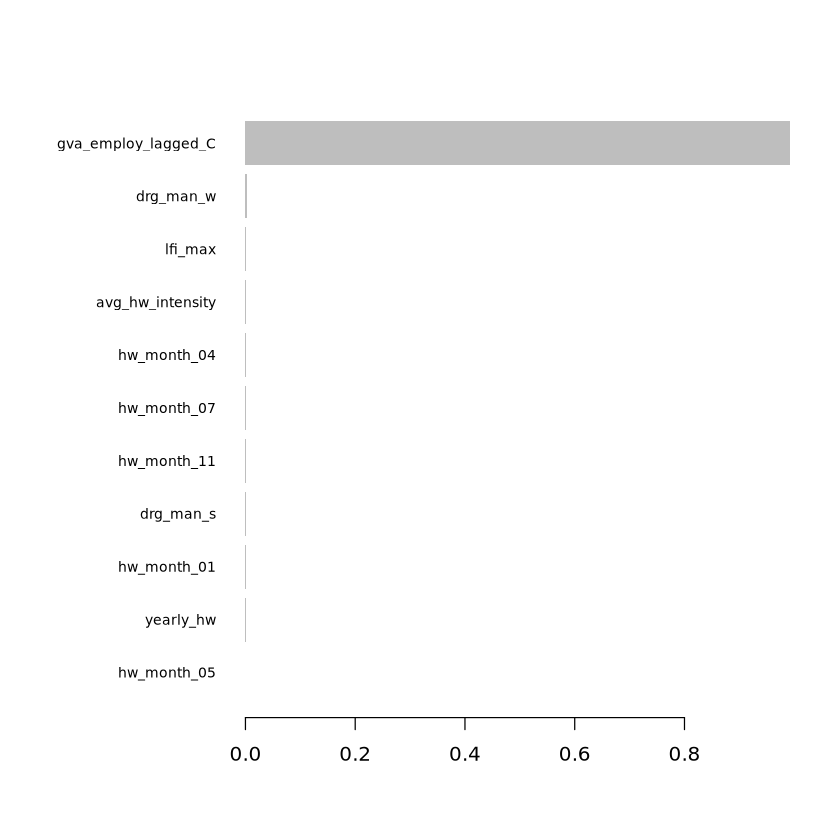

In [138]:
train.data.C <- xgboost::xgb.DMatrix(data = as.matrix(train_C.x_wNUTS), 
                          label=as.matrix(train_C.y))

eval.data.C <- xgboost::xgb.DMatrix(data = as.matrix(eval_C.x_wNUTS), 
                          label=as.matrix(eval_C.y))

wl.C<- list(train = train.data.C, eval = eval.data.C)

param.C <- list(max_depth = 4, eta = 0.75, verbose = 1, nthread = 2,  
              objective = "reg:squarederror", eval_metric = "rmse")

C.model <- xgboost::xgb.train(param.C, data=train.data.C, watchlist=wl.C, nrounds=10)

i.m.C <- xgboost::xgb.importance(model = C.model)


xgboost::xgb.plot.importance(importance_matrix = i.m.C)

In [139]:
fd.raw <- fd.raw %>% mutate(river_yes = ifelse(lfi_max > 0, 1, 0)) 

In [140]:
fd.raw <- fd.raw %>% mutate(gva_C= gva_employ_C* employment_C) 

In [141]:
cor(fd.raw$gva_C, fd.raw$gva_employ_C)

[1] 0.5090007

In [142]:
summary(fd.raw$river_yes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  1.0000  0.6777  1.0000  1.0000    2559 

In [143]:
summary(fd.raw$lfi_max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.5110  0.4626  0.8410  0.9990    2559 

In [144]:
test <-lm(gva_employ_C ~gva_employ_lagged_C + lfi_max + avg_hw_intensity + drg_man_w +  drg_man_s + yearly_hw, fd.raw)

In [152]:
test <-lm(gva_employ_C ~gva_employ_lagged_C + spi12_yearly, fd.raw)

In [146]:
summary(fd.raw$lfi_max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.5110  0.4626  0.8410  0.9990    2559 

In [153]:
summary(test)


Call:
lm(formula = gva_employ_C ~ gva_employ_lagged_C + spi12_yearly, 
    data = fd.raw)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.340  -2.322  -0.079   2.292 297.861 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.180172   0.118885   9.927   <2e-16 ***
gva_employ_lagged_C  1.000019   0.001901 525.940   <2e-16 ***
spi12_yearly        -0.012696   0.058164  -0.218    0.827    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.426 on 17701 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.9399,	Adjusted R-squared:  0.9399 
F-statistic: 1.384e+05 on 2 and 17701 DF,  p-value: < 2.2e-16
